# Galaxy 10 Classification Project 
## *By: Alexandria Ransom*
### *Background: 'Y' target variabble is a total of 10 classes. (Classifiying galaxy shapes into these 10 classes, and then creating a button web application to see the outcome)*
#### Link to dataset: https://astronn.readthedocs.io/en/latest/galaxy10.html

### Import Modules 

In [116]:
import pandas as pd # x values are the pixels y- values are the labels 
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical #ask Converts a class vector (integers) to binary class matrix.
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterSampler # it will allow to create random variations in the model 
#building neural network
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [3]:
filepath = "C:\\Users\\AlexandriaRansom\\Downloads\\Galaxy10_DECals.h5"

In [4]:
with h5py.File(filepath, 'r') as F:
  x = np.array(F['images'])
  y = np.array(F['ans'])

#### 1.) Do EDA ( Preview the data and the target variable) 

In [5]:
x.shape # this have 4 dim 17736(different images rows, width 256, width 256, height 3(RGB)(pixels))

(17736, 256, 256, 3)

In [6]:
y.shape # 17736 labels given value between 0-9 to figure out which class they belong to

(17736,)

In [7]:
x[0] # 256, 256, 3 look at shape, width = 256 pixels , height = 256 pixels, height = 3 channels RGB  

array([[[68, 19, 23],
        [58, 17, 33],
        [40, 16, 40],
        ...,
        [51, 46, 43],
        [40, 41, 33],
        [28, 38, 30]],

       [[61, 40, 37],
        [52, 43, 44],
        [29, 39, 41],
        ...,
        [28, 30, 42],
        [28, 32, 35],
        [33, 40, 33]],

       [[30, 31, 25],
        [24, 41, 33],
        [15, 45, 33],
        ...,
        [21, 35, 48],
        [25, 35, 45],
        [37, 41, 40]],

       ...,

       [[28, 32, 35],
        [27, 31, 32],
        [42, 44, 43],
        ...,
        [20, 37, 27],
        [19, 40, 21],
        [27, 50, 24]],

       [[22, 36, 37],
        [19, 29, 30],
        [33, 37, 38],
        ...,
        [17, 35, 35],
        [17, 35, 21],
        [26, 45, 17]],

       [[18, 39, 40],
        [14, 28, 29],
        [24, 30, 30],
        ...,
        [20, 35, 56],
        [27, 37, 36],
        [28, 36, 15]]], dtype=uint8)

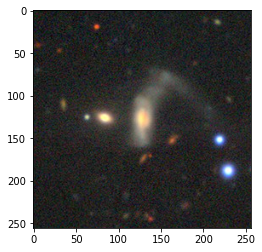

In [8]:
plt.imshow(x[0]);

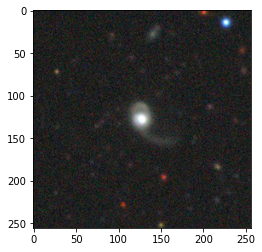

In [9]:
plt.imshow(x[4]);

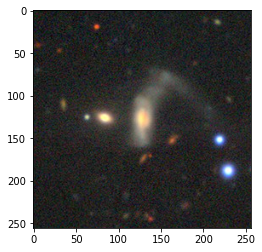

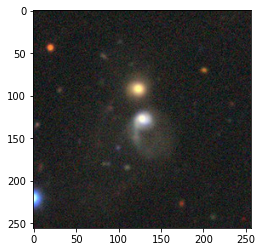

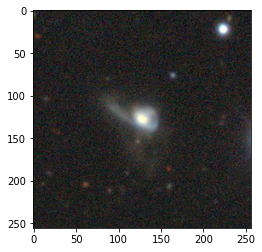

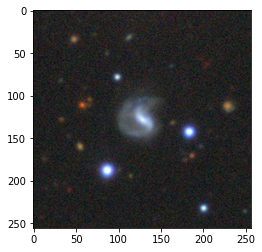

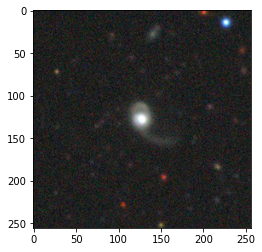

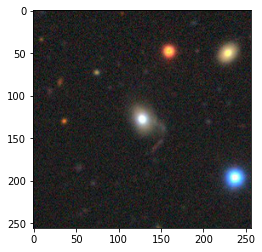

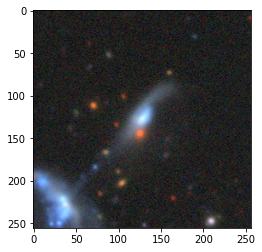

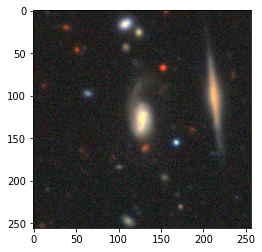

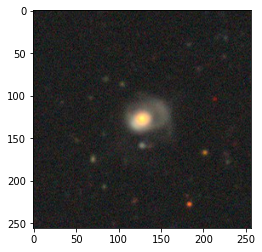

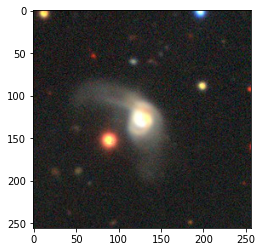

In [11]:
for i in range(10):
    plt.imshow(x[i])
    plt.show()

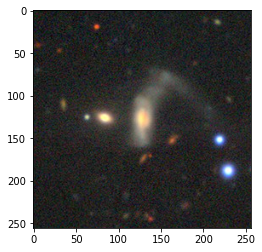

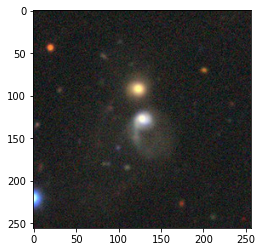

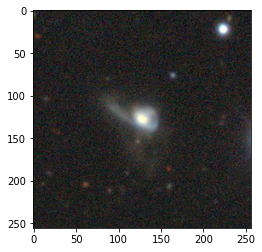

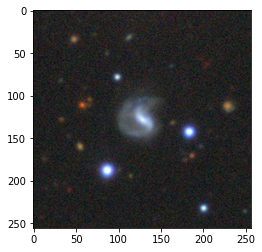

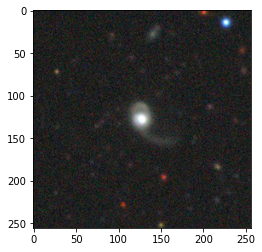

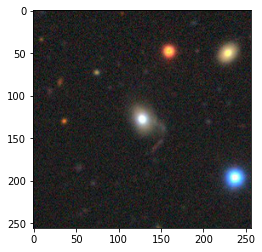

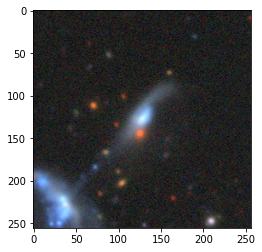

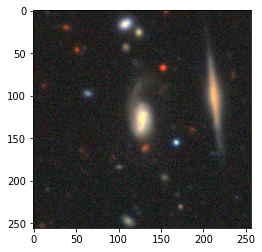

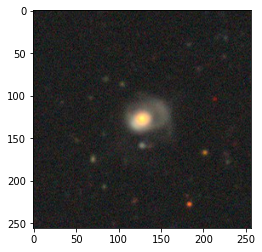

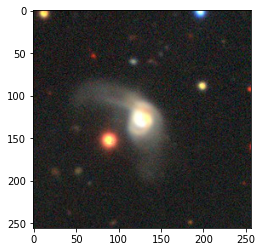

In [12]:
for i in range(10):
    image = x[i] # accessing row the index is pointing to, one by one
    plt.imshow(image)
    plt.show()

In [13]:
x[0] # this all data from first row

array([[[68, 19, 23],
        [58, 17, 33],
        [40, 16, 40],
        ...,
        [51, 46, 43],
        [40, 41, 33],
        [28, 38, 30]],

       [[61, 40, 37],
        [52, 43, 44],
        [29, 39, 41],
        ...,
        [28, 30, 42],
        [28, 32, 35],
        [33, 40, 33]],

       [[30, 31, 25],
        [24, 41, 33],
        [15, 45, 33],
        ...,
        [21, 35, 48],
        [25, 35, 45],
        [37, 41, 40]],

       ...,

       [[28, 32, 35],
        [27, 31, 32],
        [42, 44, 43],
        ...,
        [20, 37, 27],
        [19, 40, 21],
        [27, 50, 24]],

       [[22, 36, 37],
        [19, 29, 30],
        [33, 37, 38],
        ...,
        [17, 35, 35],
        [17, 35, 21],
        [26, 45, 17]],

       [[18, 39, 40],
        [14, 28, 29],
        [24, 30, 30],
        ...,
        [20, 35, 56],
        [27, 37, 36],
        [28, 36, 15]]], dtype=uint8)

In [14]:
x[1]

array([[[19, 26, 42],
        [15, 27, 39],
        [15, 22, 32],
        ...,
        [32, 37, 33],
        [34, 23, 21],
        [66, 35, 40]],

       [[ 9, 29, 20],
        [31, 37, 33],
        [31, 27, 26],
        ...,
        [31, 37, 33],
        [34, 31, 26],
        [42, 28, 27]],

       [[ 3, 25,  2],
        [38, 42, 27],
        [31, 22, 13],
        ...,
        [32, 33, 28],
        [41, 38, 33],
        [43, 42, 37]],

       ...,

       [[13, 51, 40],
        [29, 33, 34],
        [53, 21, 36],
        ...,
        [17, 17, 27],
        [ 9, 13, 14],
        [32, 33, 19]],

       [[13, 32, 30],
        [32, 25, 32],
        [56, 25, 40],
        ...,
        [28, 25, 34],
        [22, 34, 30],
        [17, 38, 19]],

       [[38, 27, 35],
        [36, 20, 30],
        [48, 28, 40],
        ...,
        [28, 22, 26],
        [19, 45, 34],
        [ 0, 34, 14]]], dtype=uint8)

In [15]:
x[2]

array([[[ 41,  66,  71],
        [ 39,  59,  60],
        [ 38,  40,  39],
        ...,
        [ 35,  32,  23],
        [ 52,  38,  35],
        [ 49,  26,  36]],

       [[ 40,  66,  63],
        [ 47,  61,  61],
        [ 46,  42,  41],
        ...,
        [ 17,  21,   6],
        [ 21,  16,  10],
        [ 47,  31,  42]],

       [[ 78, 100,  87],
        [ 54,  64,  55],
        [ 55,  50,  46],
        ...,
        [ 32,  44,  20],
        [ 25,  31,  21],
        [ 42,  39,  50]],

       ...,

       [[ 69,  26,  35],
        [ 48,  34,  34],
        [ 20,  31,  27],
        ...,
        [ 30,  28,  31],
        [ 42,  38,  35],
        [ 34,  32,  20]],

       [[ 42,  21,  28],
        [ 43,  34,  37],
        [ 31,  31,  29],
        ...,
        [ 28,  37,  34],
        [ 39,  45,  31],
        [ 31,  35,  12]],

       [[ 23,  43,  42],
        [ 45,  49,  50],
        [ 40,  24,  25],
        ...,
        [ 22,  38,  25],
        [ 15,  30,   7],
        [ 35,  45,  21]]

In [16]:
y[4] #here we are looking at the label y, we see this image 4 belongs to class 0 

0

C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


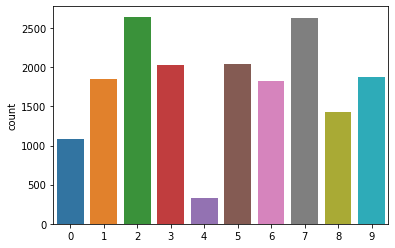

In [17]:
#Distrbution of classes in the y variable 

sns.countplot(y);

Notes

* undersampling so it won't crash, undersampling for imbalanced classification problem
* sample each class so that it will match the number of images in class 4 since it's the lowest in count value, reducing the images to about 340 images so that it's an equal class everywhere
* stratified undersampling for balanced datasets

In [19]:
rus = RandomUnderSampler(random_state=888, sampling_strategy='not minority') # it will undersample everything except 4
#X_res, y_res = rus.fit_resample(X, y) # What you want here: just the index values for our dataset, our former data import we have 3 dim --> wont work in this library--> grabbing the indicies 2dim . look at x.shape 

In [20]:
x.shape

(17736, 256, 256, 3)

In [21]:
# we are creating range as indicies like pandas dataframe

index = np.array(range(x.shape[0])) # this will give you all the values to 17000+, we want to convert this to numpy array

In [22]:
index.shape

(17736,)

In [23]:
index[0:5]

array([0, 1, 2, 3, 4])

In [24]:
index[-5:]

array([17731, 17732, 17733, 17734, 17735])

In [25]:
#X_res, y_res = rus.fit_resample(index, y)

In [26]:
#np.reshape(), we need to convert to 2 dim , only 1 dim
seconddim = index.reshape((index.shape[0], 1))

In [27]:
seconddim.shape

(17736, 1)

In [28]:
seconddim[0:7]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [29]:
Second_index_res, y_res = rus.fit_resample(seconddim, y)

In [30]:
Second_index_res.shape # resampling had 2 motivations so that the model won't crash, and to use a metric that is easy to explain

(3340, 1)

In [31]:
Second_index_res[0:5] # these are just index values of rows , randomly took, resampled and shuffled them around, taking random sample of indicies 

array([[ 489],
       [ 356],
       [ 928],
       [1074],
       [ 754]])

In [32]:
# it will now take these excat samples 489, 356 to actual array --> of pixels 

In [33]:
x[Second_index_res].shape

(3340, 1, 256, 256, 3)

In [34]:
Second_index_res.ravel() # only doing this to second instead of 2 dm --> 1D in order for it now to work with pixels 

array([  489,   356,   928, ..., 17692, 16348, 15997])

In [35]:
x[Second_index_res.ravel()].shape # making this 4D  

(3340, 256, 256, 3)

In [36]:
x_res = x[Second_index_res.ravel()] # now you have resampled dataset, we created undersampled dataset now , minority and reduce the amount of data

C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


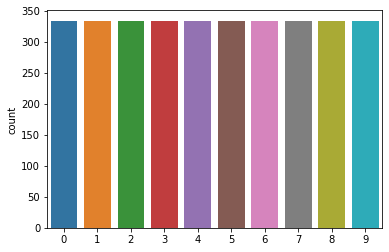

In [37]:
sns.countplot(y_res); # dist. of labels, the new y value 

In [38]:
x_res.shape

(3340, 256, 256, 3)

#### 2.)Use train_test_split to create 4 variables: X_train, X_test, y_train, y_test

#### 3.) We will not touch test set until after

In [42]:
# train and test set
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101, stratify=y_res) #  x and y values, test size split data , random state makes sure you get the same data every time, stratify= to ensure the data gets imported balanced correct ratio) 


In [43]:
X_train.shape # 80% of data in training set

(2672, 256, 256, 3)

In [44]:
X_test.shape

(668, 256, 256, 3)

#### 4.) Do pre-processing like fixing data types, missing value imputation, one-hot-encoding.


In [45]:
# Start with Pre-Processing: Goal is to get this data ready for machine learning neural networks

#Let's pre-process one image
sample_pic = X_train[7]

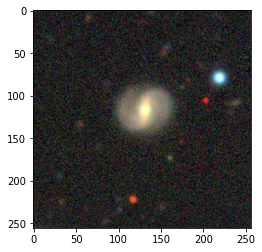

In [46]:
plt.imshow(sample_pic) # will be pre-processing this image

In [47]:
# multiply width and height, then X by total number of channels
256 * 256 * 3 # this is total number of neurons , all the images are same dim, all images have this many neurons, we can build neural network with this size for input layer

196608

Notes

* resizing this number 196608  so model won't crash 
* 196608 is total number of pixels of each image --> that number becomes input layer
* the way to reduce 196608, this is to make sure that every photo is the same size with resize function, conv neural networks has seperate way , this is for forwardfeeding networks this is a basic neural network

In [51]:
newimage = cv2.resize(sample_pic,(64, 64)) # 4096, 2048, 1024, 512, 256, 128, 64

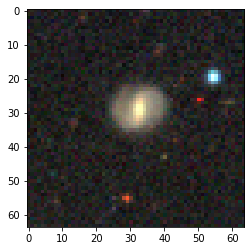

In [52]:
plt.imshow(newimage) # blurry because we lost some pixels 

In [53]:
newimage.shape # this confirms shape update

(64, 64, 3)

Notes
* pre-processed this to 64 by 64 by 3
* removing 3 rbg layers removing color palette , grayscaling. This reduces number of pixels for input layer


In [55]:
64*64*3 # now reducing this pixel size even more removing 3 layers

12288

In [56]:
gray = cv2.cvtColor(newimage, cv2.COLOR_BGR2GRAY)

In [57]:
gray.shape

(64, 64)

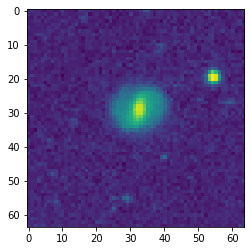

In [59]:
plt.imshow(gray) # stripping color is a great way to reduce size of image

In [60]:
# resizing and grey scaling was for single image above , now we are doing this for every image

Notes: 
    Example 

* for i in range(10):
*	plt.imshow(x[i]) # these are first 10 rows 
*	plt.show()

In [61]:
X_train.shape[0]

2672

In [62]:
gray_photo = gray.ravel() # this was to reshape to 4096 1D --> this was reshaped to fit our regular classification algothrims ravel means downsizing to 1D


In [63]:
gray_photo

array([33, 41, 34, ..., 22, 49, 36], dtype=uint8)

In [64]:
gray_photo.shape # this is confirming that we converted the 64 by 64 by 3. After we grey scaled it , became 64 by 64 by 1 --> Unraveling: Took every pixel value reshaped into 1D list

(4096,)

In [65]:
#now we want to have 2672 rows and 4096 columns(unraveled)

In [66]:
total_rows = X_train.shape[0]

In [67]:
arr = [] # empty list , keep adding images to this empty array one at a time, to save them

In [68]:
for i in range(total_rows):
  image = X_train[i] # the door 
  image = cv2.resize(image,(64, 64))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.ravel() # rows and columns that are algothrims understand
  arr.append(image)

In [69]:
arr

[array([38, 36, 47, ..., 15, 50, 37], dtype=uint8),
 array([37, 37, 34, ..., 33, 41, 35], dtype=uint8),
 array([31, 32, 37, ..., 41, 33, 34], dtype=uint8),
 array([34, 40, 35, ..., 23, 35, 30], dtype=uint8),
 array([32, 32, 31, ..., 33, 34, 30], dtype=uint8),
 array([28, 28, 39, ..., 37, 37, 36], dtype=uint8),
 array([27, 22, 38, ..., 27, 24, 31], dtype=uint8),
 array([33, 41, 34, ..., 22, 49, 36], dtype=uint8),
 array([23, 40, 42, ..., 32, 40, 28], dtype=uint8),
 array([44, 32, 30, ..., 28, 25, 27], dtype=uint8),
 array([40, 30, 29, ..., 32, 32, 30], dtype=uint8),
 array([36, 26, 31, ..., 15, 30, 36], dtype=uint8),
 array([30, 19, 32, ..., 48, 33, 42], dtype=uint8),
 array([29, 31, 35, ..., 35, 37, 28], dtype=uint8),
 array([28, 18, 35, ..., 26, 34, 40], dtype=uint8),
 array([18, 31, 34, ..., 25, 23, 32], dtype=uint8),
 array([32, 34, 33, ..., 23, 31, 28], dtype=uint8),
 array([34, 25, 33, ..., 31, 33, 34], dtype=uint8),
 array([28, 21, 27, ..., 26, 29, 32], dtype=uint8),
 array([25, 

In [70]:
type(arr)

list

In [71]:
type(arr[0])

numpy.ndarray

In [72]:
# now we are converting our arr list to an array and saving this pre-processed list as our new X_train set. 

X_train = np.asarray(arr)


In [73]:
X_train.shape # each column now represents a pixel

(2672, 4096)

* final transformation to do called min max scaling. It will convert all the values to numbers between 0 and 1 --> computational more effective if the values are between 0 and 1
* from sklearn.preprocessing import MinMaxScaler

In [74]:
X_train[0] # see the values are not between 0 and 1 --> let's fix that

array([38, 36, 47, ..., 15, 50, 37], dtype=uint8)

In [75]:
scaler = MinMaxScaler()

In [76]:
scaler.fit(X_train)

MinMaxScaler()

In [77]:
# now transform 2 steps fit, transform 
X_train = scaler.transform(X_train)


In [78]:
X_train[0] # takes min and max values of each row the formula is given in scikit learn,X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min

array([0.11111111, 0.11764706, 0.17333333, ..., 0.01826484, 0.16182573,
       0.10878661])

In [79]:
# Pre-processing is done ! :)

*  Now figure out which metric to use, 
*  we figured which metric to use by looking at how well the data is balanced in y , how explainable you want your model to be 

* creating a baseline score that we want to improve 

*  we want to know what's the best possible accuracy score we can get without even training a model

*  if we just build a model that predicts class 0 , then we would have an accuracy of 10% , there is 10 classes total
*  baseline 10% 

#### Creating Baseline Model 
##### if you build the model with just 0, 1 # you would have a baseline of just 50 % and incorrectly 50%

In [81]:
#this is to prove the baseline , just predicts 1 value , what would be accuracy score it will get 10 %
baseline_preds = np.ones((len(X_train)))


In [82]:
baseline_preds # just predicting 1 symbolizes first class

array([1., 1., 1., ..., 1., 1., 1.])

In [83]:
y_train # this is real y values, class 3, class 9 , but baseline model is just predicting 1

array([3, 9, 6, ..., 0, 5, 5], dtype=uint8)

In [84]:
baseline_score = accuracy_score(y_train, baseline_preds)
baseline_score
# the goal is to do better than the baseline model. Do better than 10 % . If you had 2 classes your goal would be to do better than 50%

0.0999251497005988

#### 5) (This step already done in step 2 bypass) Separate out the target (y) variable from the train set to create a train_X and train_y.
#### 6) Do cross-validation on the train set to get the best performing model.



In [87]:
#cross-validate machine learning models
models = {
          "KNN K-nearest neighbors": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(random_state=101),
          "RandomForestClassifier": RandomForestClassifier(random_state=101),
          "Logistic Regression": LogisticRegression()
         }

def crossValidate(models, X_train, y_train, cv, scoring):
    folds = StratifiedKFold(n_splits=cv, shuffle=True, random_state=101)
    scoresDf = pd.DataFrame(columns=["modelName", "score"])
    for modelName, model in models.items():
        print(f"training model: {modelName}")
        scores = cross_val_score(model, X_train, y_train, cv=folds, scoring=scoring)
        avg_score = np.mean(scores)
        scoresDf = scoresDf.append({"modelName": modelName, "score":avg_score}, ignore_index=True)
    scoresDf.sort_values(by='score', ascending=False, inplace=True, ignore_index=True)
    return scoresDf
#choosing evaluation metric of accuracy
scoresDf = crossValidate(models, X_train, y_train, cv=3, scoring='accuracy')

training model: KNN K-nearest neighbors
training model: DecisionTreeClassifier
training model: RandomForestClassifier
training model: Logistic Regression


C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AlexandriaRansom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [88]:
scoresDf

,modelName,score
0,RandomForestClassifier,0.389972
1,KNN K-nearest neighbors,0.288918
2,DecisionTreeClassifier,0.237276
3,Logistic Regression,0.222307


In [89]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)


In [91]:
y_train_new = to_categorical(y_train, num_classes=10)

In [ ]:
#building neural network

In [93]:
scores = [] # building this neural network , fitting on cross validation , fit


for train_ind, val_ind in folds.split(X_train, y_train): # looping through x train set and y train set
        X_train_cv = X_train[train_ind] # using indicies above to go through each x and y . This loop with happen 5 times, 5 different training and test splits 
        y_train_cv = y_train_new[train_ind]
        X_val = X_train[val_ind] # looping through training and cross validation , training on one split and predicting on val and will complete 5 times 
        y_val = y_train_new[val_ind]
        clear_session() # we want the model to clear it's memory to start fresh , to make sure there is no leak between 2 runs. we want it to be seperate and not carry over previous model runs
        model = Sequential() # base to model the model 
        model.add(Dense(input_shape=(X_train.shape[1],), units=2053, activation='relu')) # input layer shape: the number of pixels we are feeding (the number of columns), units are the number of units are, 4096+10) / 2
        # units = 4096+10) / 2

        model.add(Dense(units=2053, activation='relu')) # the second hidden layer with same about units : tuning to figure out the right number of units 
        model.add(Dense(units=10, activation='softmax')) # this out put layer 10 classes for labels 
        model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # it's using this to update the weights and biases
        model.fit(X_train_cv, y_train_cv, epochs=20) # fitting the model with 20 epochs 
        preds = model.predict(X_val) # predictions on val set 
        score = accuracy_score(np.argmax(y_val, axis=1), np.argmax(preds, axis=1)) # calculating the accuracy score , how many of those images were predicted correctly out example : 300 
        scores.append(score) # saving this score in the variable called 'scores'. We will have 5 different in this list
        # how to read the score properly example : validation set has 300 images predicted 150/300 --> 50 % accuracy that were correctly identified 

Epoch 1/20
67/67 [==============================] - 9s 123ms/step - loss: 2.3704 - accuracy: 0.1320
Epoch 2/20
67/67 [==============================] - 8s 118ms/step - loss: 2.1269 - accuracy: 0.1876
Epoch 3/20
67/67 [==============================] - 8s 124ms/step - loss: 2.0110 - accuracy: 0.2461
Epoch 4/20
67/67 [==============================] - 8s 115ms/step - loss: 1.9035 - accuracy: 0.2864
Epoch 5/20
67/67 [==============================] - 7s 111ms/step - loss: 1.7862 - accuracy: 0.3219
Epoch 6/20
67/67 [==============================] - 7s 111ms/step - loss: 1.6671 - accuracy: 0.3617
Epoch 7/20
67/67 [==============================] - 7s 110ms/step - loss: 1.6162 - accuracy: 0.3828
Epoch 8/20
67/67 [==============================] - 7s 111ms/step - loss: 1.5405 - accuracy: 0.4212
Epoch 9/20
67/67 [==============================] - 7s 110ms/step - loss: 1.4989 - accuracy: 0.4343
Epoch 10/20
67/67 [==============================] - 8s 116ms/step - loss: 1.4513 - accuracy: 0.4544

In [94]:
scores # running 20 times for 5 runs on training 

[0.34766355140186916,
 0.38317757009345793,
 0.3464419475655431,
 0.33707865168539325,
 0.3895131086142322]

In [95]:
np.mean(scores)

# 35.59 % 

0.3607749658720991

* convo layer --> we are doing extra steps before input layer . The data needs to be pre-processed before input layer

* 3 main parts 
* 1.) Layer called convo layer
* 2.) pooling layer
* 3.) flatten layer

In [98]:
X_train.shape # we want to shape this to make it work with convo layers now 
# 2672 images, 4096 pixels (# number of columns)

(2672, 4096)

In [99]:
X_train = X_train.reshape((X_train.shape[0], 64, 64, 1))

In [100]:
X_train.shape # this is pre .ravel() in order for it to work in convo network framework needs to be 64, 64, 1, 

(2672, 64, 64, 1)

In [101]:
# we are modeling this to make this flow with the convo network --> reshape it back to 64 by 64 by 1 because we gray scaled it's usually 3. We are using these 
# numbers because we reshaped it this way . The reshaping we did 64 by 64 to 4000

# cross val
scores = [] # building this neural network , fitting on cross validation , fit


for train_ind, val_ind in folds.split(X_train, y_train): # looping through x train set and y train set
        X_train_cv = X_train[train_ind] # using indicies above to go through each x and y . This loop with happen 5 times, 5 different training and test splits 
        y_train_cv = y_train_new[train_ind]
        X_val = X_train[val_ind] # looping through training and cross validation , training on one split and predicting on val and will complete 5 times 
        y_val = y_train_new[val_ind]
        clear_session() # we want the model to clear it's memory to start fresh , to make sure there is no leak between 2 runs. we want it to be seperate and not carry over previous model runs
        model = Sequential() # base to model the model 
        # adding convo layers right before the input layer
        model.add(Conv2D(input_shape=(64, 64, 1), filters=32, kernel_size=(3,3),activation='relu')) #extract the best features of images update it to new shape, filters how many convo filters do you want this to output --> 32 slices of image
        model.add(MaxPooling2D()) # brings all features together
        model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D()) # increasing complexity of the model choose some and tune later
        model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
        model.add(MaxPooling2D())
        model.add(Flatten()) # reshapes the output of the convo layer to make it useful , the output of the pre-processing can be flatten so that the remaining neural network can sue


                                                                    #kernel_size : 3 pixel by 3 pixel matrix , look at each image 3 pixels by 3 pixels --> to create filters                                                                                                                                                                                                 
        model.add(Dense( units=581, activation='relu')) # Changing units to 1 temp

        model.add(Dense(units=581, activation='relu')) # the second hidden layer with same about units : tuning to figure out the right number of units 
        model.add(Dense(units=10, activation='softmax')) # this out put layer 10 classes for labels 
        model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # it's using this to update the weights and biases
        model.fit(X_train_cv, y_train_cv, epochs=20) # fitting the model with 20 epochs 
        preds = model.predict(X_val) # predictions on val set 
        score = accuracy_score(np.argmax(y_val, axis=1), np.argmax(preds, axis=1)) # calculating the accuracy score , how many of those images were predicted correctly out example : 300 
        scores.append(score) # saving this score in the variable called 'scores'. We will have 5 different in this list
        # how to read the score properly example : validation set has 300 images predicted 150/300 --> 50 % accuracy that were correctly identified 






       # print("X_train_cv.shape: ", X_train_cv.shape)
       # print("y_train_cv.shape: ", y_train_cv.shape)
       # print("X_val.shape: ", X_val.shape)
       # print("y_val.shape: ", y_val.shape)
# here are training set and validations and then make predictions on validation sets. 5 different scores and then take the average

Epoch 1/20
67/67 [==============================] - 7s 94ms/step - loss: 2.2138 - accuracy: 0.1685
Epoch 2/20
67/67 [==============================] - 8s 115ms/step - loss: 1.8292 - accuracy: 0.3290
Epoch 3/20
67/67 [==============================] - 7s 103ms/step - loss: 1.5969 - accuracy: 0.4020
Epoch 4/20
67/67 [==============================] - 7s 102ms/step - loss: 1.4437 - accuracy: 0.4562
Epoch 5/20
67/67 [==============================] - 7s 100ms/step - loss: 1.2993 - accuracy: 0.5007
Epoch 6/20
67/67 [==============================] - 7s 102ms/step - loss: 1.1529 - accuracy: 0.5498
Epoch 7/20
67/67 [==============================] - 7s 100ms/step - loss: 1.0159 - accuracy: 0.6200
Epoch 8/20
67/67 [==============================] - 7s 98ms/step - loss: 0.8732 - accuracy: 0.6757
Epoch 9/20
67/67 [==============================] - 7s 101ms/step - loss: 0.7131 - accuracy: 0.7272
Epoch 10/20
67/67 [==============================] - 7s 109ms/step - loss: 0.6012 - accuracy: 0.7857
E

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [103]:
model.save('/content/drive/MyDrive/Colab Notebooks/best_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/best_model\assets


In [105]:
# finding the correct number of units 
# formula to find the number of units 

model = Sequential() # base to model the model 
# adding convo layers right before the input layer
model.add(Conv2D(input_shape=(64, 64, 1), filters=32, kernel_size=(3,3),activation='relu')) #extract the best features of images update it to new shape, filters how many convo filters do ypu want this to output --> 32 slices of image
model.add(MaxPooling2D()) # brings all features together
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten()) # reshapes the output of the convo layer to make it useful , the output of the pre-processing can be flatten so that the remaining neural network can sue


                                                            #kernel_size : 3 pixel by 3 pixel matrix , look at each image 3 pixels by 3 pixels --> to create filters                                                                                                                                                                                                 
model.add(Dense( units=1, activation='relu')) # Changing units to 1 temp

model.add(Dense(units=1, activation='relu')) # the second hidden layer with same about units : tuning to figure out the right number of units 
model.add(Dense(units=10, activation='softmax')) # this out put layer 10 classes for labels 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
model.summary() # flatten layer 1152 
#units 1152 + 10/2, # just showing what you defined so far 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [107]:
(1152 + 10)/2 # finding out number of units 

581.0

In [108]:
np.mean(scores)

0.4060527144807309

### 7.) Do hyperparameter tuning 
* Do hyper-parameter tuning on the best model to improve score even more.


In [110]:
#trying hyperparamter tuning, loss and optimizer can be changed 
# example of behind scenes

model = Sequential() # 
# adding convo layers right before the input layer
model.add(Conv2D(input_shape=(64, 64, 1), filters=32, kernel_size=(3,3),activation='relu')) #so we can't change input change, kernel size can't be bigger than input shape, we change the filters, we can change the kernel size, and activation function as well
model.add(MaxPooling2D()) # not change
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu')) # we can change the kernel size, filters, activation 
model.add(MaxPooling2D()) # nothing 
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))# we can change the kernel size, filters, activation 
model.add(MaxPooling2D()) # nothing 
model.add(Flatten()) # unravel method 


                                                                                                                                                                                                                                                            
model.add(Dense( units=581, activation='relu')) # change units and activation function, change 581

model.add(Dense(units=581, activation='relu')) # change units and activation function, change to 581
model.add(Dense(units=10, activation='softmax')) # for the end one , only change activation function
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # change optimizer and loss 

In [111]:
def cnn_hyper(filter01, filter02, activation01): #layer01):


  model = Sequential() # 
  # adding convo layers right before the input layer
  model.add(Conv2D(input_shape=(64, 64, 1), filters=filter01, kernel_size=(3,3),activation='relu')) #so we can't change input change, kernel size can't be bigger than input shape, we change the filters, we can change the kernel size, and activation function as well
  model.add(MaxPooling2D()) # not change
  model.add(Conv2D(filters=filter02, kernel_size=(3,3),activation='relu')) # we can change the kernel size, filters, activation 
  model.add(MaxPooling2D()) # nothing 
  model.add(Conv2D(filters=32, kernel_size=(3,3),activation= activation01))# we can change the kernel size, filters, activation 
  model.add(MaxPooling2D()) # nothing 
  model.add(Flatten()) # unravel method 
  #model.add(layer01)

                                                                                                                                                                                                                                                              
  model.add(Dense( units=581, activation='relu')) # change units and activation function, change 581

  model.add(Dense(units=581, activation='relu')) # change units and activation function, change to 581
  model.add(Dense(units=10, activation='softmax')) # for the end one , only change activation function
  model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # change optimizer and loss 
  return model

In [118]:
param_grid = {'filter01': [16,32,48,64],
              'filter02': [16,32,48,64],
              'activation01':['relu', 'tanh'],
             # 'layer01': [MaxPooling2D(),]
} 


In [119]:
params_combos = list(ParameterSampler(param_grid, 6)) # randomly select number

In [120]:
params_combos # same as randomcv

[{'filter02': 48, 'filter01': 48, 'activation01': 'tanh'},
 {'filter02': 48, 'filter01': 32, 'activation01': 'tanh'},
 {'filter02': 16, 'filter01': 32, 'activation01': 'relu'},
 {'filter02': 32, 'filter01': 48, 'activation01': 'relu'},
 {'filter02': 48, 'filter01': 64, 'activation01': 'relu'},
 {'filter02': 32, 'filter01': 64, 'activation01': 'tanh'}]

In [121]:
#updating cross val to add hyperparameter tuning
# this 5 fold cross val per each param combos , updating this for hyperparameter tuning, this will make prediction
#will take this best model and make predictions of test data 
best_score = 0 # referring to mean 
best_params = {}
best_model = None

# the purpose of variables is to find the best score across the params_combos, out of all 6 , what is the best score achieved from that
# best_params varaible what are excat parameters that gave the best score . Which one of those 6 gave the best score ?
# best_model : what was the exact model that gave us the score



for params in params_combos:
  print("params: ", params)

  scores = [] # building this neural network , fitting on cross validation , fit


  for train_ind, val_ind in folds.split(X_train, y_train): # looping through x train set and y train set
          X_train_cv = X_train[train_ind] # using indicies above to go through each x and y . This loop with happen 5 times, 5 different training and test splits 
          y_train_cv = y_train_new[train_ind]
          X_val = X_train[val_ind] # looping through training and cross validation , training on one split and predicting on val and will complete 5 times 
          y_val = y_train_new[val_ind]
          clear_session() # we want the model to clear it's memory to start fresh , to make sure there is no leak between 2 runs. we want it to be seperate and not carry over previous model runs
          model = cnn_hyper(**params) # this is calling our previous function and the single params we defined from params_combos grid, passing each param_grid, ** unwrap of the contents of the dictionary

          model.fit(X_train_cv, y_train_cv, epochs=20) # fitting the model with 20 epochs 
          preds = model.predict(X_val) # predictions on val set 
          score = accuracy_score(np.argmax(y_val, axis=1), np.argmax(preds, axis=1)) # calculating the accuracy score , how many of those images were predicted correctly out example : 300 
          scores.append(score) # saving this score in the variable called 'scores'. We will have 5 different in this list
          # how to read the score properly example : validation set has 300 images predicted 150/300 --> 50 % accuracy that were correctly identified 
            # cross val score
  mean_score = np.mean(scores)
  if mean_score > best_score:       # per parameters this will alway be true for first iteration  
            best_score = mean_score
            best_params = params
            best_model = model  # extracting the best of the best through iterations of params_ combos extract 1 of the 6 that is the best of the best
#the output will be the best score, best params, and best model
#will take this best model and make predictions of test data 

params:  {'filter02': 48, 'filter01': 48, 'activation01': 'tanh'}
Epoch 1/20
67/67 [==============================] - 11s 157ms/step - loss: 2.1725 - accuracy: 0.1937
Epoch 2/20
67/67 [==============================] - 10s 146ms/step - loss: 1.8187 - accuracy: 0.3159
Epoch 3/20
67/67 [==============================] - 10s 146ms/step - loss: 1.5389 - accuracy: 0.4123
Epoch 4/20
67/67 [==============================] - 10s 147ms/step - loss: 1.3500 - accuracy: 0.4899
Epoch 5/20
67/67 [==============================] - 10s 154ms/step - loss: 1.1305 - accuracy: 0.5690
Epoch 6/20
67/67 [==============================] - 11s 168ms/step - loss: 0.9476 - accuracy: 0.6486
Epoch 7/20
67/67 [==============================] - 14s 213ms/step - loss: 0.7597 - accuracy: 0.7178
Epoch 8/20
67/67 [==============================] - 11s 167ms/step - loss: 0.5794 - accuracy: 0.7876
Epoch 9/20
67/67 [==============================] - 11s 168ms/step - loss: 0.3945 - accuracy: 0.8699
Epoch 10/20
67/67 [======

In [122]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [124]:
save_path = '/content/drive/MyDrive/Colab Notebooks/best_model'
best_model.save(save_path) #DOWNLOAD FILES on computer 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/best_model\assets


In [125]:
# writing code to make predictions on test data . Applying to test data . Repeat to test set 
arr = []
for i in range(X_test.shape[0]):
    image = X_test[i]
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.ravel()
    arr.append(image)
# the same we completed earlier

In [126]:
X_test = np.asarray(arr)
X_test = scaler.transform(X_test) # we are just transforming it not fit , we are using the same variable to transform our test set


# because be chose a convo neural network reshaping data similarly 
X_test = X_test.reshape((X_test.shape[0], 64, 64, 1))
# modify y test 
y_test = to_categorical(y_test, num_classes=10)
# it will finish pre-process on test , After finish pre-process

# 8.) Do predictions on the test set

In [127]:
# use the best model from hyperparameter tuning . Use that model to make predictions on test set
preds = best_model.predict(X_test)


In [128]:
score = accuracy_score(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
# this is to see how accurate these predictions were 

In [129]:
score # this is to see what the best score is , this is score to take to project manager score on unseen 

0.40718562874251496

# Notes for next phase 

In [133]:

#Framework for building button application 


-using docker to upload image and build a container deploying to google cloud's registry, app engine

Building application: Button is doing behind the scenes 
* 1.) Define images per class: What we want the user experience to be ? How would we define that? 5 images per class so 50 images total --> It will pick 1 image out of 50 to show them from any class 

* 2.) Display the image that we picked 
* 3.) Now we want to pre-process this image --> so that we can make a prediction
* 4.) Feed this pre-processed image to our model and get back a prediction
*What class the image belongs to ? 
* 5.) Display the prediction 

User's eye 
- user clicks our button
-users see's image that was selected
- user see's the prediction that the model made (class of image)


- Randomly select 50 image where 5 belong to each of the 10 classes : this is through sampling